**Trabajo Práctico**

**Predecir el precio por metro cuadrado de una propiedad**

**Objetivos:**

* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.

* Realizar un análisis descriptivo de las principales variables.

* Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.


## Análisis Exploratorio de Datos

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Guardamos el path del archivo en una variable para despues cargarlo en un df
data_location = "Data/properatti.csv"

# Creamos un DataFrame con la info del csv
data_original = pd.read_csv(data_location, sep = ",", low_memory=False,index_col=0)

In [3]:
data=data_original.copy()

In [4]:
# Veamos la forma del df
pd.set_option("display.max_colwidth",70)
data.head(4)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_pati...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEV...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_bal...,"Venta de departamento en décimo piso al frente, a estrenar. Living...",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_la...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º ...",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/...


In [5]:
print(f'El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas')

El dataset tiene 121220 filas y 25 columnas


##### Se analizan las columnas

Proporción de no nulos en cada columna

In [6]:
(data.notnull().sum() / data.shape[0]).round(2)

operation                     1.00
property_type                 1.00
place_name                    1.00
place_with_parent_names       1.00
country_name                  1.00
state_name                    1.00
geonames_id                   0.85
lat-lon                       0.57
lat                           0.57
lon                           0.57
price                         0.83
currency                      0.83
price_aprox_local_currency    0.83
price_aprox_usd               0.83
surface_total_in_m2           0.68
surface_covered_in_m2         0.84
price_usd_per_m2              0.57
price_per_m2                  0.72
floor                         0.07
rooms                         0.39
expenses                      0.12
properati_url                 1.00
description                   1.00
title                         1.00
image_thumbnail               0.97
dtype: float64

In [7]:
#Se controla que no hay duplicados por url y title
data.duplicated(subset=['properati_url','title']).value_counts()

False    121220
dtype: int64

In [8]:
#Se reemplaza los 0.0 por NaN
data.replace(0.0,np.NaN,inplace=True)

##### Renombramos las columnas y eliminamos las siguientes:

operation:  se elimina por ser todos 'sell'

country_name: se elimina por ser todos 'Argentina'

floor: se elimina, no hay suficientes datos

expenses: se elimina, no hay suficientes datos

properati_url: se elimina no aporta información

image_thumbnail: se elimina no aporta información


In [9]:
#Eliminamos las columnas que no aportan informacion descriptiva al df

data.drop(columns=['operation','country_name','floor','expenses','properati_url','image_thumbnail'],inplace=True)
data.dtypes

property_type                  object
place_name                     object
place_with_parent_names        object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
rooms                         float64
description                    object
title                          object
dtype: object

In [10]:
#Renombramos las columnas restantes 

data.rename(columns={ 'property_type': 'Tipo_Propiedad',
                    'place_name': 'Barrio',
                    'place_with_parent_names': 'Ubicacion_Completa',
                    'state_name': 'Provincia',
                    'geonames_id': 'GeoNames_ID',
                    'lat-lon': 'Latitud_Longitud',
                    'lat': 'Latitud',
                    'lon': 'Longitud',
                    'price': 'Precio',
                    'currency': 'Moneda',
                    'price_aprox_local_currency': 'Precio_ARS',
                    'price_aprox_usd': 'Precio_Dolares',
                    'surface_total_in_m2': 'Metros_Totales',
                    'surface_covered_in_m2': 'Metros_Cubiertos',
                    'price_usd_per_m2': 'Precio_m2_Dls',
                    'price_per_m2': 'Precio_m2',
                    'rooms': 'Cantidad_Ambientes',
                    'description': 'Descripcion',
                    'title': 'Titulo'}, inplace=True)

##### Tipos de propiedades en el dataset

In [11]:
data["Tipo_Propiedad"].value_counts()

apartment    71065
house        40268
PH            5751
store         4136
Name: Tipo_Propiedad, dtype: int64

##### Gráfica con los tipos de propiedades y sus cantidades

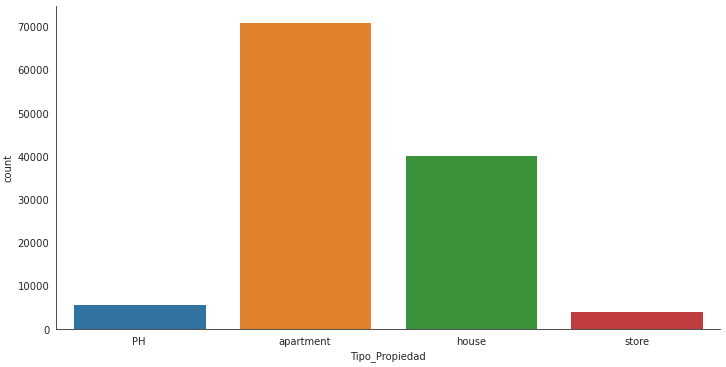

In [12]:
with sns.axes_style('white'):
    g = sns.catplot(x = "Tipo_Propiedad", data=data, aspect=2, kind="count")
    g.set_xticklabels(step=1)

##### Lugares de donde son las propiedades

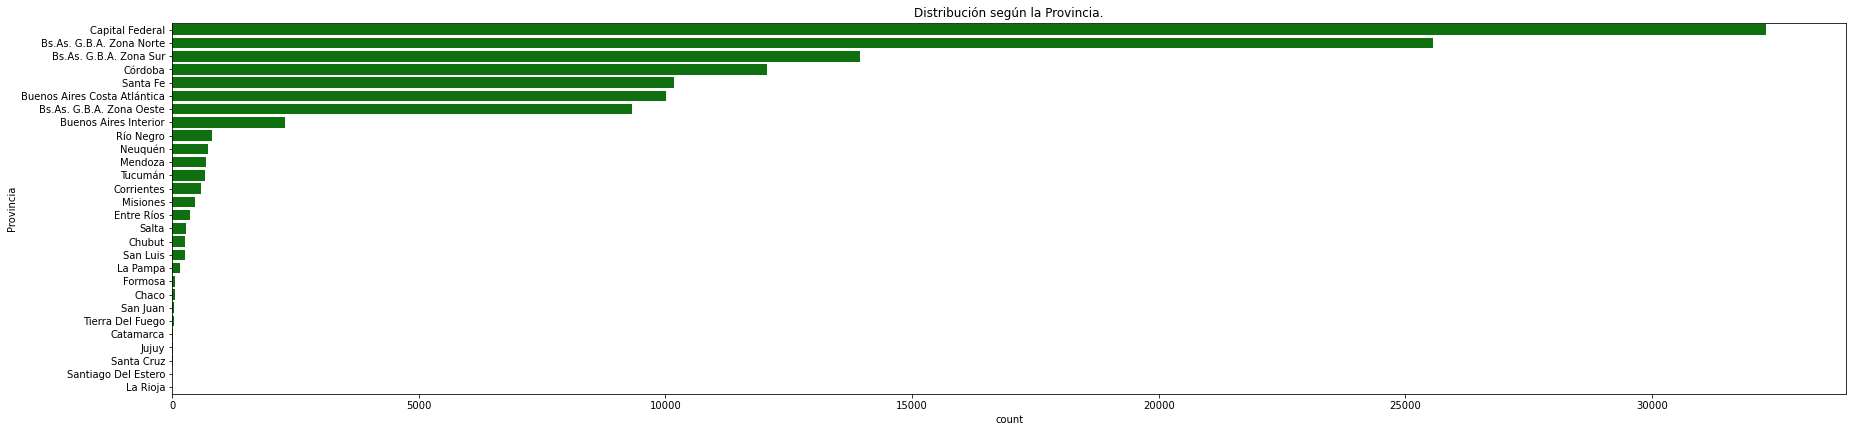

In [13]:
fig= plt.subplots(figsize=(30,30),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1=plt.subplot(grid[0])
sns.countplot(data=data,y="Provincia",order=data["Provincia"].value_counts().index,ax=ax1,color="g")

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Distribución según la Provincia.", fontsize= 'large')


plt.show()

## Procesamiento individual de las columnas del DataSet

Procedimiento que se realiza en las columnas de interés:

1- Se filtran los outliers

2- Se buscan string de interés con regex para rellenar datos faltantes

3- Se infieren datos según la columna

4- Se elimina o se deja la columna  

#### Análisis de la columna Cantidad_Ambientes

1- Se analiza la descripción y el título primero con regex porque la columna tiene 61% de nulos.

2- Se decide eliminar la columna ya que se consigue disminuir la cantidad de nulos hasta un 40%.

In [14]:
regex='\d (A|a)(M|m)(B|b)(ientes)?'
regex_compilado = re.compile(regex)

#Funcion regex que extrae los ambientes y los guarda en ambientes
def regex_ambientes(columna):
    regex_ambientes = data[columna].apply(lambda x : x if x is np.NaN else regex_compilado.search(x))
    regex_ambientes = regex_ambientes.apply(lambda x : np.NaN if x is np.NaN or x is None else x[0].split()[0])
    regex_ambientes = regex_ambientes.astype('float')
       
    mask_data = data.Cantidad_Ambientes.isnull() 
    mask_regex_ambientes = regex_ambientes.notnull()
    mask_data = np.logical_and(mask_regex_ambientes,mask_data)
    data.Cantidad_Ambientes[mask_data] = regex_ambientes[mask_data]
   
    return mask_data

In [15]:
mask_description_apply = regex_ambientes('Descripcion')
mask_title_apply = regex_ambientes('Titulo')

In [16]:
#Mostramos lo que cambio la regex en el dataset
pd.concat([data_original.loc[mask_description_apply,['rooms']],data.loc[mask_description_apply,['Cantidad_Ambientes','Titulo','Descripcion']]],axis=1).sample(5)

,rooms,Cantidad_Ambientes,Titulo,Descripcion
31496,NaN,3.0,CASA EN VENTA,"Venta de Casa tipo PH 3 AMBIENTES, Quilmes OestePH con cochera sob..."
90709,NaN,3.0,Departamento - 3 Ambientes - San Telmo,En una Muy Interesante Ubicacion Barrial: A Metros del cruce de la...
72937,NaN,2.0,Departamento - Barrio Norte,Lindisino Dto de 2 amb a la Vta. Barrio Norte a metros de Subte D ...
51418,NaN,1.0,DEPARTAMENTO EN VENTA,Venta de Departamento 1 AMBIENTE en Posadas. Excelentísima ubicaci...
850,NaN,5.0,"Casa 184m² con 3 Plantas en Haedo 2200, San Isidro, Beccar, por U$...",SimpÃ¡tico Triplex de 5 Ambientes ubicado en el complejo Jardines ...


In [17]:
pd.concat([data_original.loc[mask_title_apply,['rooms']],data.loc[mask_title_apply,['Cantidad_Ambientes','Titulo','Descripcion']]],axis=1).sample(5)

,rooms,Cantidad_Ambientes,Titulo,Descripcion
18476,NaN,3.0,VENTA 3 AMBIENTES CON TERRAZA,Hermoso departamento reciclado. Externo con balcón. Cocina con bar...
93589,NaN,2.0,Lumiere Puerto Madero - Olga Cossettini - 2 Ambientes con cochera,UNIDADES PRÓXIMAS A ENTREGARSE Hermoso departamento dos ambientes....
92971,NaN,3.0,CHALET 3 AMBIENTES EN HAEDO,EXCELENTE CHALET EN HAEDO - LOTE DE 10 X 20CHALET EN DOS PLANTAS- ...
89878,NaN,3.0,Espectacular 3 ambientes en venta en el condominio YOO NORDELTA co...,Ubicado en la mejor esquina del edificio con toda la vista plena a...
55214,NaN,4.0,Casa de 4 ambientes en Venta en Paternal,excelente casa en Flores Norte a metros de Av. Gaona 3 cuadras de ...


Analizamos en que proporción se completó la columna ambientes

In [18]:
print('Proporción de nulos data original:',(data_original['rooms'].isnull().sum() / data_original.shape[0]).round(2))
print('Proporción de nulos data limpio:',(data['Cantidad_Ambientes'].isnull().sum() / data.shape[0]).round(2))

Proporción de nulos data original: 0.61
Proporción de nulos data limpio: 0.43


<AxesSubplot:xlabel='Tipo_Propiedad', ylabel='Cantidad_Ambientes'>

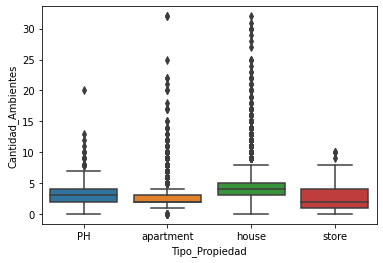

In [19]:
# Veamoslo graficamente
sns.boxplot(y='Cantidad_Ambientes',x='Tipo_Propiedad',data=data)

Se decide eliminar la columna ya que hay demasidos valores que son nulos.

In [20]:
#Se elimina la columna Cantidad_Ambientes por falta de información
data.drop(columns=['Cantidad_Ambientes'],inplace=True)

In [21]:
data.columns

Index(['Tipo_Propiedad', 'Barrio', 'Ubicacion_Completa', 'Provincia',
       'GeoNames_ID', 'Latitud_Longitud', 'Latitud', 'Longitud', 'Precio',
       'Moneda', 'Precio_ARS', 'Precio_Dolares', 'Metros_Totales',
       'Metros_Cubiertos', 'Precio_m2_Dls', 'Precio_m2', 'Descripcion',
       'Titulo'],
      dtype='object')

#### Analizamos amenities pileta y balcón

1- Se analiza la descripción con regex y se busca si la propiedad tiene pileta o balcón.

2- Se crea una columna 'Amenities_Pileta' y otra 'Amenities_Balcon' 

In [22]:
#buscar los que tienen pileta en la columna de descripción y crear una nueva columna de amenities

pattern_pileta = "(pileta|Pileta|PILETA)"
pattern_pileta_compilado = re.compile(pattern_pileta)
match_con_pileta = data.Descripcion.apply(lambda x: x if x is np.NaN else pattern_pileta_compilado.search(x))

mask_data_pileta_match_notnull = match_con_pileta.notnull()
data.loc[mask_data_pileta_match_notnull, "Amenities_Pileta"] = match_con_pileta[mask_data_pileta_match_notnull].apply(lambda x: x.group(0))

data.loc[mask_data_pileta_match_notnull, ["Descripcion", "Amenities_Pileta"]]

,Descripcion,Amenities_Pileta
7,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO AL...,PILETA
8,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER LUMINOSO ...PISO AL...,PILETA
23,"Hermoso departamento, ubicado en la calle Almirante Brown, a metro...",pileta
30,"Muy linda casa , toda en planta baja, doble pared de 30, ladrillo ...",pileta
36,"Casa en Pilar centro ,a pocas cuadras de la plaza principal de Pil...",pileta
...,...,...
121211,Excelente departamento de categoría con vistas parciales al Río en...,pileta
121212,ESPECTACULAR CASA ESTILO RACIONALISTA EN CALLE CORTADA!!! TIENE UN...,pileta
121213,EXCELENTE casa en Martinez. Inmejorable ubicaicón!! De Av. Liberta...,pileta
121215,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecable Departamento.Livi...,pileta


In [23]:
Columna_Amenities_Pileta = data.loc[:, 'Amenities_Pileta']
mask_pileta_nulls = Columna_Amenities_Pileta.isnull()
data.loc[mask_pileta_nulls,'Amenities_Pileta'] = 'no tiene'

cadena_reemplazo = "pileta"
data["Amenities_Pileta"] = data["Amenities_Pileta"].apply(lambda x: pattern_pileta_compilado.sub(cadena_reemplazo, x))
data.loc[:,['Amenities_Pileta','Descripcion']].sample(5)

,Amenities_Pileta,Descripcion
65093,pileta,Te invitamos a conocer: Antigua CerveceríaFechas de entrega 3 prim...
62320,no tiene,Nuevo y moderno!SUM y Gimnasio!Gran nivel de amenities! Cocheras a...
51308,no tiene,"VENTA DE DEPARTAMENTO EN EDIFICIO A ESTRENAR PISO 1º DPTO ""B"" A FR..."
21045,no tiene,Corredor Responsable: Ariel Champanier - CUCICBA 4330Contacto: Fab...
5100,no tiene,CODIGO: 719-1542 ubicado en: sarmiento 4649 - Publicado por: CARR...


In [24]:
#Analizar si tiene balcón

pattern_balcon = "(Balcon|Balcón|balcon|BALCON)"
pattern_balcon_compilado = re.compile(pattern_balcon)
match_con_balcon = data.Descripcion.apply(lambda x: x if x is np.NaN else pattern_balcon_compilado.search(x))

mask_data_balcon_match_notnull = match_con_balcon.notnull()
data.loc[mask_data_balcon_match_notnull, "Amenities_Balcon"] = match_con_balcon[mask_data_balcon_match_notnull].apply(lambda x: x.group(0))

data.loc[mask_data_balcon_match_notnull, ["Descripcion", "Amenities_Balcon"]]

Columna_Amenities_balcon = data.loc[:, 'Amenities_Balcon']

mask_balcon_nulls = Columna_Amenities_balcon.isnull()

data.loc[mask_balcon_nulls,'Amenities_Balcon'] = 'no tiene'

cadena_reemplazo = "balcon"
data["Amenities_Balcon"] = data["Amenities_Balcon"].apply(lambda x: pattern_balcon_compilado.sub(cadena_reemplazo, x))
data.loc[:,['Amenities_Balcon','Descripcion']].head(5)

,Amenities_Balcon,Descripcion
0,no tiene,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEV..."
1,balcon,"Venta de departamento en décimo piso al frente, a estrenar. Living..."
2,no tiene,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA...
3,no tiene,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º ..."
4,no tiene,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE,..."


In [25]:
print('Propiedades que tienen en la descripción Balcón: \n',data.Amenities_Balcon.value_counts())
print('\nPropiedades que tienen en la descripción Pileta: \n',data.Amenities_Pileta.value_counts())

Propiedades que tienen en la descripción Balcón: 
 no tiene    98550
balcon      22670
Name: Amenities_Balcon, dtype: int64

Propiedades que tienen en la descripción Pileta: 
 no tiene    102180
pileta       19040
Name: Amenities_Pileta, dtype: int64


### Analizamos las columnas de superficie total y cubierta

1- Filtramos outliers discriminado por tipo de propiedad y que se no se encuentren contenidos dentro de 2 desvios estandar.

2- Buscamos con regex en la descripción los metros cuadrados de aquellas propiedades que esten incompletas.

3- Se verifica que la superficie total se mayor o igual a la superficie cubierta, si no se cumple se reemplaza la superficie cubierta con la total.

4 - Si una superfice es NaN se completa con la otra.

<AxesSubplot:title={'center':'Metros Cubiertos'}, xlabel='Tipo_Propiedad', ylabel='Metros_Cubiertos'>

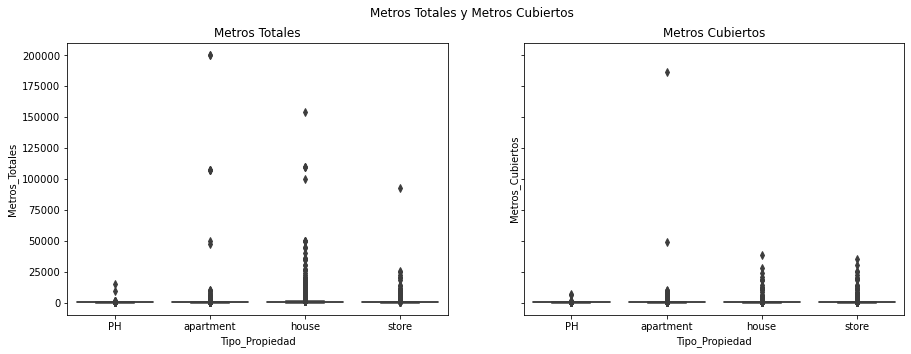

In [26]:
#Se analizan graficamente los outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Metros Totales y Metros Cubiertos')

axes[0].set_title('Metros Totales')
sns.boxplot(ax=axes[0],y='Metros_Totales',x='Tipo_Propiedad',data=data)

axes[1].set_title('Metros Cubiertos')
sns.boxplot(ax=axes[1],y='Metros_Cubiertos',x='Tipo_Propiedad',data=data)

In [27]:
#Se eliminan los outliers


mask_metro_totales = data['Metros_Totales'] < 5000
mask_metro_cubiertos = data['Metros_Cubiertos'] < 700

medias_metros_cubiertos = data.loc[mask_metro_cubiertos,:].groupby('Tipo_Propiedad')['Metros_Cubiertos'].mean()
std_metros_cubiertos = data.loc[mask_metro_cubiertos,:].groupby('Tipo_Propiedad')['Metros_Cubiertos'].std() 

medias_metros_totales = data.loc[mask_metro_totales,:].groupby('Tipo_Propiedad')['Metros_Totales'].mean()
std_metros_totales = data.loc[mask_metro_totales,:].groupby('Tipo_Propiedad')['Metros_Totales'].std()

data.Metros_Cubiertos=data.apply(lambda x : np.NaN if (np.abs(x.Metros_Cubiertos - medias_metros_cubiertos[x.Tipo_Propiedad])>= (2*std_metros_cubiertos[x.Tipo_Propiedad])) else x.Metros_Cubiertos,axis=1)
data.Metros_Totales=data.apply(lambda x : np.NaN if (np.abs(x.Metros_Totales - medias_metros_totales[x.Tipo_Propiedad])>= (2*std_metros_totales[x.Tipo_Propiedad])) else x.Metros_Totales,axis=1)
  

Aplicamos regex en la descripción

In [28]:
#Separar una columna con la superficie desde description

pattern_superf = "\d+( )?(M|m)( )?(2)"
pattern_superf_compilado = re.compile(pattern_superf)
match_con_superf = data.Descripcion.apply(lambda x: x if x is np.NaN else pattern_superf_compilado.search(x))

mask_data_superf_match_notnull = match_con_superf.notnull()

#Se crea columna Superf_de_descrip con los valores matcheados de descripcion
data.loc[mask_data_superf_match_notnull, "Superficie_de_descrip"] = match_con_superf[mask_data_superf_match_notnull].apply(lambda x: x.group(0))

#Se divide la columna Superf_de_descrip y se crea un nuevo data frame con las columnas separadas  
Superficie_de_descrip = data["Superficie_de_descrip"].str.split("( )?(m|M)",expand=True)
Superficie_de_descrip = Superficie_de_descrip.drop([1,2,3], axis = 1)
Superficie_de_descrip.columns = ['Superf_descrip_num']

#Se concatena el nuevo df sobre el data set
data = pd.concat([data,Superficie_de_descrip], axis=1)

data = data.drop("Superficie_de_descrip", axis=1)

#Se convierte la columna Superf_descrip_num en tipo float64
data[['Superf_descrip_num']] = data[['Superf_descrip_num']].astype(float)
data['Superf_descrip_num'].replace(0.0,np.NaN,inplace=True)

#Se filtra outliers de la columna Superf_descrip_num
data.Superf_descrip_num = data.apply(lambda x : np.nan if (np.abs(x.Superf_descrip_num - medias_metros_totales[x.Tipo_Propiedad])>= (2*std_metros_totales[x.Tipo_Propiedad])) else x.Superf_descrip_num,axis=1)
 

In [29]:
data['Metros_Totales'] = data.Metros_Totales.fillna(data.Superf_descrip_num)
data['Metros_Cubiertos'] = data.Metros_Cubiertos.fillna(data.Superf_descrip_num)

data = data.drop("Superf_descrip_num", axis=1)

Se completa la superficie con los datos de columnas de Metros_Cubiertos y Metros_Totales en donde existe un NaN

Si alguna de las dos columnas de superficie esta completa, vamos a completar la otra con ese valor

In [30]:
data.loc[(data['Metros_Cubiertos'].isnull())|(data['Metros_Totales'].isnull()), ['Metros_Cubiertos','Metros_Totales']].sample(10)


,Metros_Cubiertos,Metros_Totales
73321,NaN,NaN
49069,NaN,NaN
111040,190.0,NaN
54907,NaN,55.0
81014,NaN,NaN
95819,44.0,NaN
53696,57.0,NaN
108363,110.0,NaN
78111,200.0,NaN
111629,20.0,NaN


In [31]:
#Completamos ambas columnas con algun nulo
data['Metros_Cubiertos'] = data['Metros_Cubiertos'].fillna(data['Metros_Totales'])
data['Metros_Totales'] = data['Metros_Totales'].fillna(data['Metros_Cubiertos'])

In [32]:
data.loc[data['Metros_Cubiertos']>data['Metros_Totales'],['Metros_Totales','Metros_Cubiertos']]

,Metros_Totales,Metros_Cubiertos
137,63.0,126.0
161,11.0,200.0
316,125.0,156.0
317,125.0,156.0
430,45.0,100.0
...,...,...
120522,3.0,360.0
120550,5.0,425.0
120662,150.0,350.0
120957,35.0,45.0


Vamos a reemplazar los metros cubiertos por los metros totales

In [33]:
# Armamos un dataframe con los casos que necesitamos reemplazar
metros_data = data.loc[data['Metros_Cubiertos']>data['Metros_Totales'],['Metros_Cubiertos']]

#Cambiamos el nombre de la columna para realizar el update
metros_data.columns = ['Metros_Totales']

#Hacemos el update en los casos que necesitamos
data.update(metros_data)

In [34]:
#Chequeamos que el update haya funcionado como queriamos, volviendo a filtrar el df original
data.loc[data['Metros_Cubiertos']>data['Metros_Totales'],['Metros_Totales','Metros_Cubiertos']]

,Metros_Totales,Metros_Cubiertos


<AxesSubplot:title={'center':'Metros Cubiertos'}, xlabel='Tipo_Propiedad', ylabel='Metros_Cubiertos'>

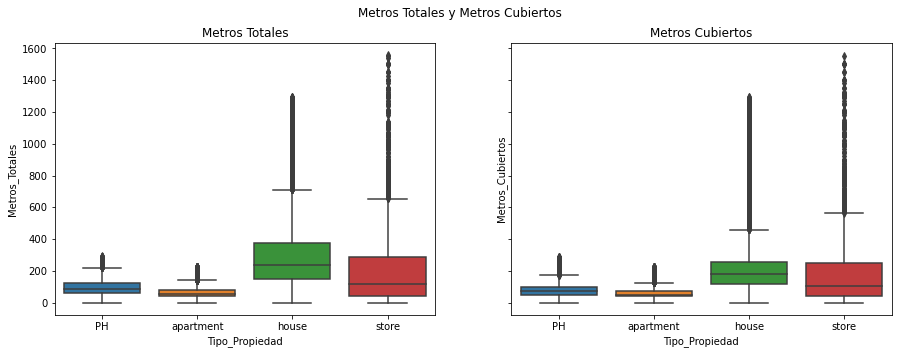

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Metros Totales y Metros Cubiertos')

axes[0].set_title('Metros Totales')
sns.boxplot(ax=axes[0],y='Metros_Totales',x='Tipo_Propiedad',data=data)

axes[1].set_title('Metros Cubiertos')
sns.boxplot(ax=axes[1],y='Metros_Cubiertos',x='Tipo_Propiedad',data=data)


### Se analiza la columna Precio en Dolares

1- Filtramos outliers discriminado por tipo de propiedad y que se no se encuentren contenidos dentro de 2 desvios estandar.

2- Con regex se busca en descripción los precios en dólares para rellenar nulos.

<AxesSubplot:xlabel='Tipo_Propiedad', ylabel='Precio_Dolares'>

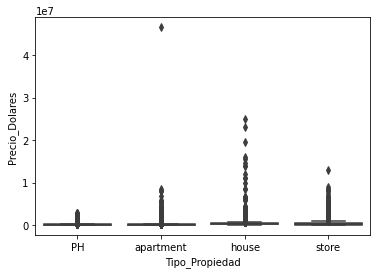

In [36]:
#Veamos outliers graficamente
sns.boxplot(y='Precio_Dolares',x='Tipo_Propiedad',data=data) 

In [37]:
# #Se eliminan los outliers
medias_Precio_Dolares = data.groupby('Tipo_Propiedad')['Precio_Dolares'].mean()
std_Precio_Dolares = data.groupby('Tipo_Propiedad')['Precio_Dolares'].std()

data.Precio_Dolares=data.apply(lambda x : np.NaN if (np.abs(x.Precio_Dolares - medias_Precio_Dolares[x.Tipo_Propiedad])>= (2*std_Precio_Dolares[x.Tipo_Propiedad])) else x.Precio_Dolares,axis=1)

In [38]:
#Se aplica regex
patron = r'(\bU\$S)(\s)(?P<miles>\d+)(\.)?(?P<unidades>\d*)'

p_dls = data.Descripcion.str.extract(patron, flags= re.IGNORECASE, expand = False)

In [39]:
#Transformamos las columnas a numeric
p_dls['miles'] = pd.to_numeric(p_dls['miles'], errors= 'coerce')
p_dls['unidades'] = pd.to_numeric(p_dls['unidades'], errors= 'coerce')

In [40]:
# Generamos la columna con el precio en dolares
p_dls['Precio'] = p_dls['miles']*1000 + p_dls['unidades']

In [41]:
# Completamos los valores nulos de la columna original
data['Precio_Regex'] = p_dls['Precio']

data.Precio_Regex=data.apply(lambda x : np.NaN if (np.abs(x.Precio_Regex - medias_Precio_Dolares[x.Tipo_Propiedad])>= (2*std_Precio_Dolares[x.Tipo_Propiedad])) else x.Precio_Regex,axis=1)
data['Precio_Dolares'] = data['Precio_Dolares'].fillna(data['Precio_Regex'])

data.drop(columns='Precio_Regex',inplace=True)

False    0.814346
True     0.185654
Name: Precio_Dolares, dtype: float64


<AxesSubplot:xlabel='Tipo_Propiedad', ylabel='Precio_Dolares'>

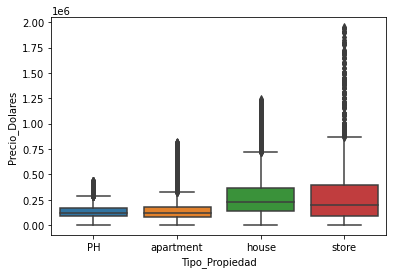

In [42]:
# Chequeamos cuantos completamos

print(data['Precio_Dolares'].isnull().value_counts()/data.shape[0])
sns.boxplot(y='Precio_Dolares',x='Tipo_Propiedad',data=data) 

### Se analiza columna de Precio en pesos


1- Filtramos outliers discriminado por tipo de propiedad y que se no se encuentren contenidos dentro de 2 desvios estandar.

2- Con regex se busca en descripción los precios en pesos para rellenar nulos.

<AxesSubplot:xlabel='Tipo_Propiedad', ylabel='Precio_ARS'>

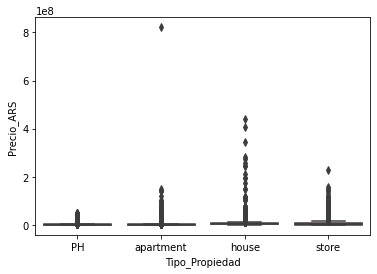

In [43]:
#Se analizan outliers graficamente
sns.boxplot(y='Precio_ARS',x='Tipo_Propiedad',data=data)

In [44]:
# Se eliminan outliers

medias_Precio_ARS = data.groupby('Tipo_Propiedad')['Precio_ARS'].mean()
std_Precio_ARS = data.groupby('Tipo_Propiedad')['Precio_ARS'].std()

data.Precio_ARS=data.apply(lambda x : np.NaN if (np.abs(x.Precio_ARS - medias_Precio_ARS[x.Tipo_Propiedad])>= (2*std_Precio_ARS[x.Tipo_Propiedad])) else x.Precio_ARS,axis=1)

In [45]:
# Chequeamos la cantidad de valores nulos 

data['Precio_ARS'].isnull().value_counts()/data.shape[0]

False    0.810823
True     0.189177
Name: Precio_ARS, dtype: float64

In [46]:
## #Se aplica regex
patron = r'(\$)(\s)?(?P<millones>\d*)(\.)?(?P<miles>\d{3})(\.)(?P<unidades>\d{3})'

p_ars = data.Descripcion.str.extract(patron, flags= re.IGNORECASE, expand = False)

In [47]:
# Chequeamos si extrajimos la informacion correctamente
p_ars.loc[~p_ars['miles'].isnull(),['millones','miles','unidades']].sample(10)

,millones,miles,unidades
116451,,700,000
87464,,344,200
101302,1,250,000
33102,,970,000
51096,4,417,994
116048,1,650,000
9485,,990,000
81221,4,200,000
3782,1,000,000
7314,,254,449


In [48]:
#Transformamos las columnas a numeric

p_ars['millones'] = pd.to_numeric(p_ars['millones'], errors= 'coerce')
p_ars['miles'] = pd.to_numeric(p_ars['miles'], errors= 'coerce')
p_ars['unidades'] = pd.to_numeric(p_ars['unidades'], errors= 'coerce')

In [49]:
# Generamos la columna con el precio en pesos

p_ars['Precio'] = p_ars['millones']*1000000 +p_ars['miles']*1000 + p_ars['unidades']

In [50]:
# Completamos los valores nulos de la columna original 
data['Precio_ARS_Regex'] = p_ars['Precio']

data.Precio_ARS_Regex=data.apply(lambda x : np.NaN if (np.abs(x.Precio_ARS_Regex - medias_Precio_ARS[x.Tipo_Propiedad])>= (2*std_Precio_ARS[x.Tipo_Propiedad])) else x.Precio_ARS_Regex,axis=1)
data['Precio_ARS'] = data['Precio_ARS'].fillna(data['Precio_ARS_Regex'])
            
data.drop(columns='Precio_ARS_Regex',inplace=True)

In [51]:
# Completamos los valores nulos de la columna original
data['Precio_ARS'] = data['Precio_ARS'].fillna(p_ars['Precio'])

### Se calcula valores faltantes con las columnas

Se eliminan outliers de las columnas Precio_m2_Dls y Precio_m2

* Precio Total

* Superficie Total

* Precio por m2

In [52]:
#Completamos Precio ARS cuando tenemos Precio x M2 y Superficie

preciom2 = data.loc[(data['Precio_ARS'].isnull())&(~data['Precio_m2'].isnull())&(~data['Metros_Totales'].isnull()) , 'Precio_m2']
superficie = data.loc[(data['Precio_ARS'].isnull())&(~data['Precio_m2'].isnull())&(~data['Metros_Totales'].isnull()) , 'Metros_Totales']

data.loc[data['Precio_ARS'].isnull(), 'Precio_ARS'] = preciom2*superficie

In [53]:
#Completamos Precio x M2 cuando tenemos Precio ARS y Superficie

precio = data.loc[~(data['Precio_ARS'].isnull())&(data['Precio_m2'].isnull())&(~data['Metros_Totales'].isnull()) , 'Precio_ARS']
superficie = data.loc[~(data['Precio_ARS'].isnull())&(data['Precio_m2'].isnull())&(~data['Metros_Totales'].isnull()) , 'Metros_Totales']

data.loc[data['Precio_m2'].isnull(), 'Precio_m2'] = precio/superficie

In [54]:
#Completamos Precio DLS cuando tenemos Precio x M2 Dls y Superficie

preciom2 = data.loc[(data['Precio_Dolares'].isnull())&(~data['Precio_m2_Dls'].isnull())&(~data['Metros_Totales'].isnull()) , 'Precio_m2_Dls']
superficie = data.loc[(data['Precio_Dolares'].isnull())&(~data['Precio_m2_Dls'].isnull())&(~data['Metros_Totales'].isnull()) , 'Metros_Totales']

data.loc[data['Precio_Dolares'].isnull(), 'Precio_Dolares'] = preciom2*superficie

In [55]:
#Completamos Precio x M2 Dls cuando tenemos Precio DLS y Superficie

precio = data.loc[~(data['Precio_Dolares'].isnull())&(data['Precio_m2_Dls'].isnull())&(~data['Metros_Totales'].isnull()) , 'Precio_Dolares']
superficie = data.loc[~(data['Precio_Dolares'].isnull())&(data['Precio_m2_Dls'].isnull())&(~data['Metros_Totales'].isnull()) , 'Metros_Totales']

data.loc[data['Precio_m2_Dls'].isnull(), 'Precio_m2_Dls'] = precio/superficie

In [56]:
#Completamos Superficie cuando tenemos Precio Total y Precio x M2 (Pesos)

preciom2 = data.loc[~(data['Precio_ARS'].isnull())&(~data['Precio_m2'].isnull())&(data['Metros_Totales'].isnull()) , 'Precio_m2']
precio = data.loc[~(data['Precio_ARS'].isnull())&(data['Precio_m2'].isnull())&(data['Metros_Totales'].isnull()) , 'Precio_ARS']


#data.loc[data['Metros_Totales'].isnull(), 'Metros_Totales'] = precio/preciom2

In [57]:
#Completamos Superficie cuando tenemos Precio Total y Precio x M2 (Dolares)

preciom2 = data.loc[~(data['Precio_Dolares'].isnull())&(~data['Precio_m2_Dls'].isnull())&(data['Metros_Totales'].isnull()) , 'Precio_m2_Dls']
precio = data.loc[~(data['Precio_Dolares'].isnull())&(data['Precio_m2_Dls'].isnull())&(data['Metros_Totales'].isnull()) , 'Precio_Dolares']


data.loc[data['Metros_Totales'].isnull(), 'Metros_Totales'] = precio/preciom2

In [58]:
medias_prov = data.groupby('Provincia')['Precio_m2_Dls'].mean()
std_prov = data.groupby('Provincia')['Precio_m2_Dls'].std()
provincias = medias_prov.index

for provincia in provincias:
    mask_prov = data.loc[:,'Provincia'] == provincia
    data.loc[mask_prov,'Precio_m2_Dls']=data.loc[mask_prov,'Precio_m2_Dls'].apply(lambda x : np.NaN if np.abs(x - medias_prov[provincia])>=2*std_prov[provincia] else x)
    

In [59]:
#Se dropean las filas que tienen NaN las columnas Metros_Totales y Precio_Dolares
def drop_filas_sup_total_price_nan(x):
    if( (pd.isnull(x.Metros_Totales)) and (pd.isnull(x.Precio_Dolares))):
        return True
    return False

drop_filas = data.apply(axis=1,func=drop_filas_sup_total_price_nan)
data.drop(index=drop_filas.index[drop_filas], axis='index',inplace=True)


In [60]:
#Eliminamos las provincias que tienen menos de 100 datos

mask_provincia = data.Provincia.value_counts() < 100
provincias_drop = mask_provincia.index[mask_provincia]

print(f'Se eliminan las filas que pertenecen a las siguientes provincias: {provincias_drop}')

for provincia in provincias_drop:
    
    mask_drop = data.Provincia == provincia
    index_drop = mask_drop.index[mask_drop]
    data.drop(index = index_drop ,axis=0,inplace=True)
    data_original.drop(index = index_drop ,axis=0,inplace=True)
    
data['Provincia'].value_counts()

Se eliminan las filas que pertenecen a las siguientes provincias: Index(['Formosa', 'Chaco', 'Tierra Del Fuego', 'San Juan', 'Santa Cruz',
       'Catamarca', 'Jujuy', 'Santiago Del Estero', 'La Rioja'],
      dtype='object')


Capital Federal                 31571
Bs.As. G.B.A. Zona Norte        25166
Bs.As. G.B.A. Zona Sur          13361
Córdoba                         11330
Buenos Aires Costa Atlántica     9750
Bs.As. G.B.A. Zona Oeste         9095
Santa Fe                         8975
Buenos Aires Interior            2199
Río Negro                         706
Neuquén                           635
Tucumán                           581
Mendoza                           559
Corrientes                        553
Misiones                          451
Entre Ríos                        336
Chubut                            241
San Luis                          241
Salta                             178
La Pampa                          115
Name: Provincia, dtype: int64

#### Se analizan nuevamente los null

In [61]:
data.isnull().sum()/data.shape[0]

Tipo_Propiedad        0.000000
Barrio                0.000190
Ubicacion_Completa    0.000000
Provincia             0.000000
GeoNames_ID           0.158553
Latitud_Longitud      0.430478
Latitud               0.430478
Longitud              0.430478
Precio                0.139784
Moneda                0.139784
Precio_ARS            0.140276
Precio_Dolares        0.140008
Metros_Totales        0.071025
Metros_Cubiertos      0.071025
Precio_m2_Dls         0.212887
Precio_m2             0.200426
Descripcion           0.000017
Titulo                0.000000
Amenities_Pileta      0.000000
Amenities_Balcon      0.000000
dtype: float64

In [62]:
#Dropeamos todas las observaciones que tengan algun valor nulo en las columnas relevantes
drop_col = ['Metros_Cubiertos','Metros_Totales', 'Precio_ARS', 'Precio_Dolares', 'Precio_m2', 'Precio_m2_Dls']

data = data.dropna(axis =0 , how = 'any', subset = drop_col)

In [63]:
data.isnull().sum()/data.shape[0]

Tipo_Propiedad        0.000000
Barrio                0.000232
Ubicacion_Completa    0.000000
Provincia             0.000000
GeoNames_ID           0.170767
Latitud_Longitud      0.418706
Latitud               0.418706
Longitud              0.418706
Precio                0.000000
Moneda                0.000000
Precio_ARS            0.000000
Precio_Dolares        0.000000
Metros_Totales        0.000000
Metros_Cubiertos      0.000000
Precio_m2_Dls         0.000000
Precio_m2             0.000000
Descripcion           0.000011
Titulo                0.000000
Amenities_Pileta      0.000000
Amenities_Balcon      0.000000
dtype: float64

## Análisis final

In [64]:
print('Tamaño final del DataSet:',data.shape)

Tamaño final del DataSet: (90357, 20)


In [65]:
data_p=data.loc[:,['Provincia','Tipo_Propiedad','Precio_m2_Dls']]

pivot = data_p.pivot_table(index='Provincia',columns='Tipo_Propiedad',aggfunc='mean').round(2)
pivot.sort_values(by=('Precio_m2_Dls', 'apartment'),ascending=False)

Precio_m2_Dls                            
Tipo_Propiedad                          PH apartment    house    store
Provincia                                                             
Capital Federal                    2061.80   2859.76  1918.65  3192.15
Bs.As. G.B.A. Zona Norte           1707.08   2458.43  1504.91  2349.08
Río Negro                          1228.66   2324.95  1366.17  1666.88
Chubut                                 NaN   2051.99  1434.49  1332.88
Buenos Aires Interior              1377.46   1975.09  1003.99  1077.49
Buenos Aires Costa Atlántica       1199.22   1934.16   822.16  1418.62
Corrientes                         1424.84   1926.15  1196.60  2289.29
Bs.As. G.B.A. Zona Sur             1474.75   1921.31  1385.66  2119.61
Bs.As. G.B.A. Zona Oeste           1417.09   1778.16  1239.76  2035.17
Neuquén                            2336.30   1765.96   950.92  1217.30
Mendoza                             900.00   1696.31  1337.29  1352.16
Santa Fe                           1342.69   1693.39  1023.04  1727.01
Córdoba                            1198.66   1581.01  1007.01  1814.45
Misiones                           1154.66   1458.45  1076.56     9.88
Entre Ríos                          474.55   1363.42   759.59  1602.06
Salta                                  NaN   1303.00  1055.08   179.47
La Pampa                               NaN   1173.62   846.77   616.92
Tucumán                            1329.82    966.94   741.49   600.30
San Luis                               NaN    912.93  1102.23  1084.32

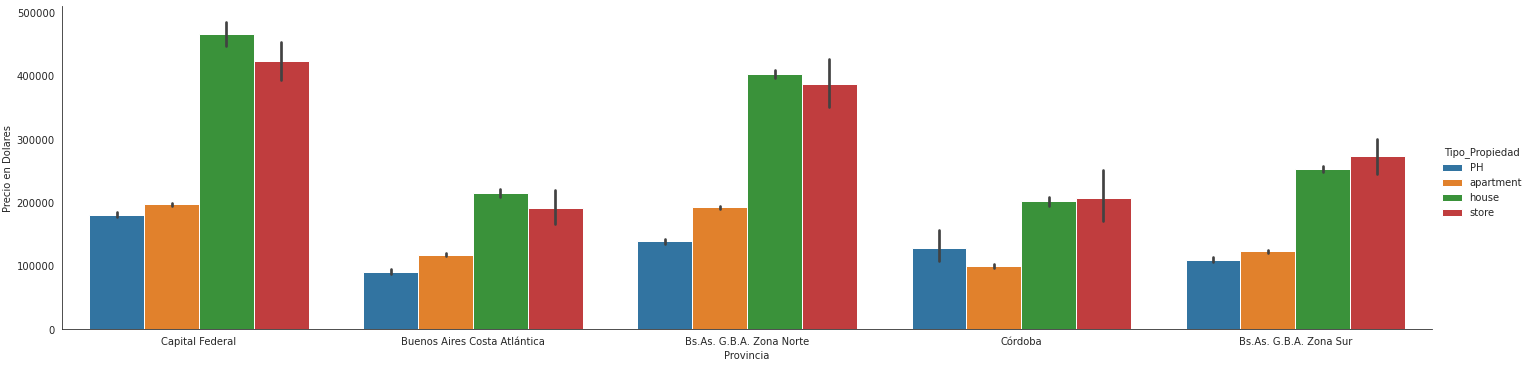

In [66]:
data_mask1 = data['Provincia'] == 'Capital Federal'
data_mask2 = data['Provincia'] == 'Bs.As. G.B.A. Zona Norte'
data_mask3 = data['Provincia'] == 'Bs.As. G.B.A. Zona Sur'
data_mask4 = data['Provincia'] == 'Buenos Aires Costa Atlántica'
data_mask5 = data['Provincia'] == 'Córdoba'

data_mask = data_mask1 | data_mask2 | data_mask3 | data_mask4  | data_mask5 

with sns.axes_style('white'):
    g = sns.catplot(x = "Provincia",y='Precio_Dolares', data=data.loc[data_mask,:], aspect=4.0, kind='bar',
                    hue='Tipo_Propiedad')
    g.set_ylabels('Precio en Dolares')
   

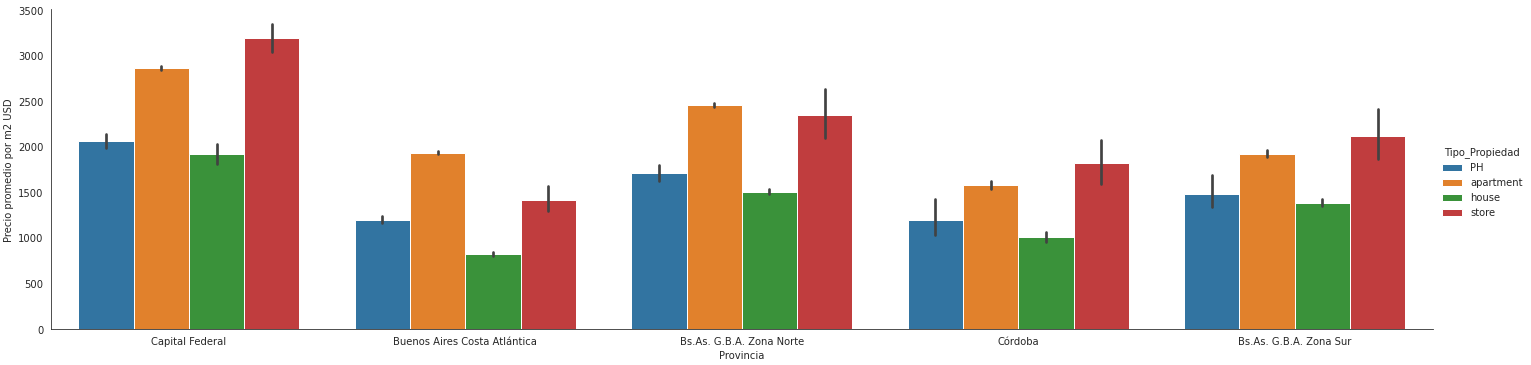

In [67]:
with sns.axes_style('white'):
    g = sns.catplot(x = "Provincia",y='Precio_m2_Dls', data=data.loc[data_mask,:], aspect=4.0, kind='bar',
                    hue='Tipo_Propiedad')
    g.set_ylabels('Precio promedio por m2 USD')

Se grafican las provincias más caras

<AxesSubplot:>

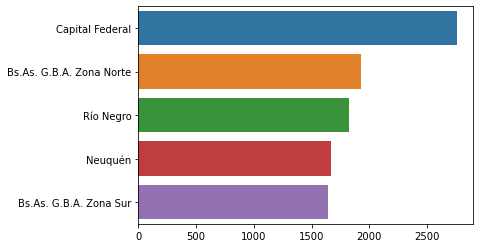

In [68]:
#Provincias mas caros

df=data

m2_Dls_Barrio = df.groupby('Provincia')['Precio_m2_Dls'].mean()

barrios_caros = list(m2_Dls_Barrio.nlargest(n=5, keep='first').index)
barrios_caros_values = list(m2_Dls_Barrio.nlargest(n=5, keep='first'))

sns.barplot(y=barrios_caros,x=barrios_caros_values,orient='h')

### Bonus!

Se observa que el m2 en dólares es mayor al contar con amenities pileta en PH, apartment y house

In [69]:
data_pileta=data.loc[:,['Provincia','Tipo_Propiedad','Precio_m2_Dls','Amenities_Pileta']]

pivot_pileta = data_pileta.pivot_table(index='Amenities_Pileta',columns='Tipo_Propiedad',aggfunc={'Precio_m2_Dls':'mean'}).round(2)
pivot_pileta.sort_values(by=('Precio_m2_Dls', 'apartment'),ascending=False)

Precio_m2_Dls                            
Tipo_Propiedad              PH apartment    house    store
Amenities_Pileta                                          
pileta                 2021.86   2579.40  1479.34  2354.75
no tiene               1689.32   2330.92  1290.75  2456.66

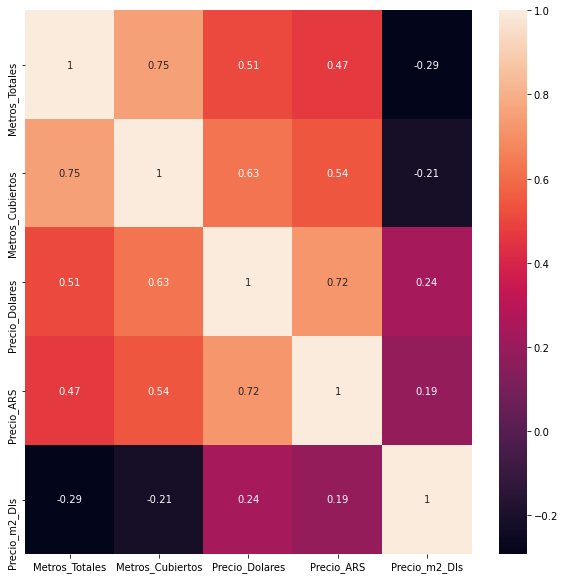

In [70]:
#Graficos la matriz de correlacion
pivot_pileta
data_corr=data.loc[:,['Metros_Totales','Metros_Cubiertos','Precio_Dolares','Precio_ARS','Precio_m2_Dls']]
fig, ax = plt.subplots(figsize=(10,10))    

sns.heatmap(data_corr.corr(), annot=True, ax=ax);

<AxesSubplot:title={'center':'DataSet_Limpio (Rojo) vs DataSet_Sucio (Azul)'}, xlabel='Porcentaje Nulos', ylabel='Columnas'>

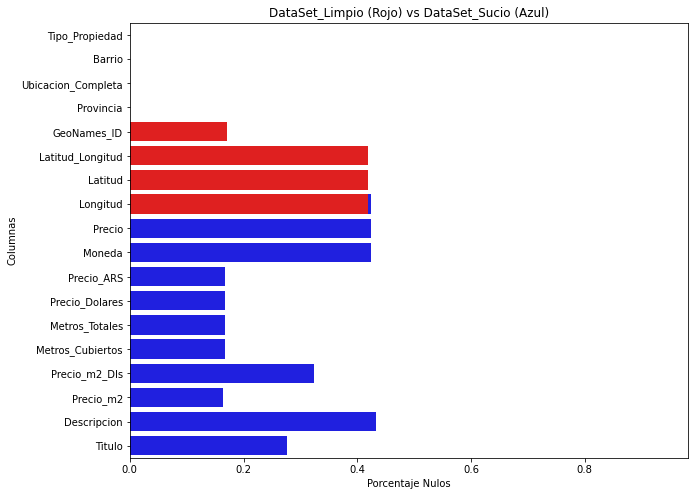

In [71]:
data_comp = data.drop(columns=['Amenities_Pileta','Amenities_Balcon'])

data_limpio = data_comp.isnull().sum()/data_comp.shape[0]
data_sucio = data_original.isnull().sum()/data_original.shape[0]
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('DataSet_Limpio (Rojo) vs DataSet_Sucio (Azul)')
ax.set_xlabel('Porcentaje Nulos')
ax.set_ylabel('Columnas')

sns.barplot(y=data_sucio.index,x=data_sucio, ax=ax,color='blue',orient='h')
sns.barplot(y=data_limpio.index,x=data_limpio, ax=ax,color='red',orient='h')



In [72]:
data.to_csv('data_practica2.csv',index=False,sep=';')

# GRACIAS!